# Q 1. Automate a system that can compute the total number of line segments from the provided image

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('photo1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU);
edge = cv2.Canny(thresh, 100, 200, apertureSize = 3)                

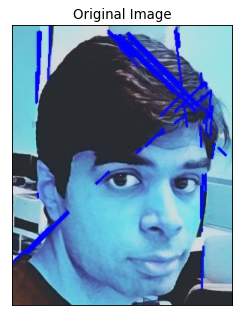

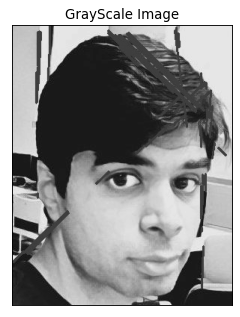

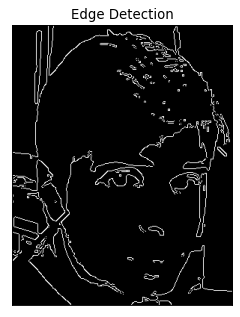

In [5]:
titles = ['Original Image','GrayScale Image','Edge Detection']
images = [img, gray,edge]
for i in range(3):
    plt.figure(figsize=(15, 10), dpi=80)
    plt.subplot(2,3, i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),
    plt.yticks([])
plt.show()

In [6]:
def line_detector(image):
    """
    Function that detects the line in edge image input
    Input: Image
    Returns: lines
    """
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi / 180 # angular resolution in radians of the Hough grid
    threshold = 20 # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 5 # minimum number of pixels making up a line
    max_line_gap = 10 # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on
     # Apply Hough on edge detected image
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]),
    min_line_length, max_line_gap)
    return lines

In [7]:
lines = line_detector(edge)
print("The Total number of lines are:", len(lines))

The Total number of lines are: 244


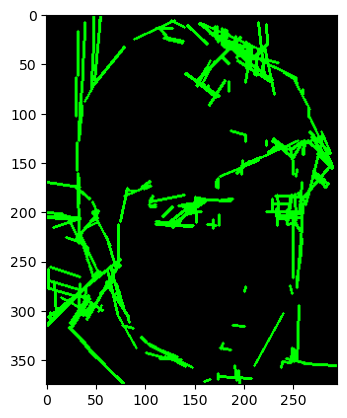

In [8]:
lines_with_image = np.copy(img) * 0
for line in lines:
    for x1,y1,x2,y2 in line:
# Draw line
        cv2.line(lines_with_image, (x1, y1), (x2, y2), (0,255,0), 2)
plt.imshow(lines_with_image)

# Q2. Show which line segment is the biggest in length.

In [13]:
def calculate_max_distance(lines):
    """
     Function that calculates the maximum distance
     """
    max_dis = 0
    for line in lines:
        for x1,y1,x2,y2 in line:
            d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
            if d > max_dis:
                max_dis = d
                p1 = (x1, y1) # Start point 1 of longest line
                p2 = (x2, y2) # End point 2 of longest line
    return max_dis, p1, p2

In [14]:
max_dist, p1, p2 = calculate_max_distance(lines)

# longest Line

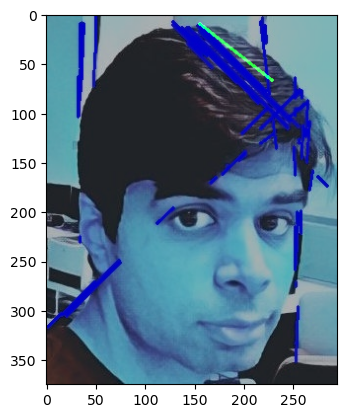

In [15]:
longest_line = np.copy(img) * 0
# Draw longest line
cv2.line(longest_line, p1, p2, (0,255,0), 2)
# Draw the longest line on the image
longest_line_img = cv2.addWeighted(img, 0.8, longest_line, 2, 0)
plt.imshow(longest_line_img)

# Q 3. Compute centroid points (including two extreme points) from each line segment. You should be able to generate coordinates (x, y) from all line segments and save them in text file.

In [21]:
def save_line_segments(lines, file_name):
    """
    A function to save the line segments in a text file
    Input : lines , name of flie
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            with open(file_name, 'a') as f:
                d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
                x, y = (x1+x2)/2, (y1+y2)/2
                f.write('{0}, {1}, {2}, {3}, {4}, {5}\n'.format(x1, y1, x2, y2));

In [ ]:
save_line_segments(lines, "coordinates.txt")